<a href="https://colab.research.google.com/github/fernnicx/Araikordai/blob/main/1016_1045_3_DNN_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab5 - Introduction to Deep Neural Network
- ชาลิสา เจริญสวัสดิ์, 64070501016
- วิชญาพร ทรัพย์เกิด, 64070501045

Name your file to 1016_1045.ipynb

## Lab Instruction

In this lab, you will learn how to build a simple fully-connected neural network with Keras and Tensorflow as the backend. We will experiment with MNIST data, which is a Keras built-in dataset.

There are three questions to answer in this lab.

See http://yann.lecun.com/exdb/mnist/ for data description.

First, import all of the libraries that will be used in this lab.

In [1]:
import keras
import numpy as np

In [2]:
from keras.datasets import mnist

### Load Data ###
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#################

### 1. Learn About the Data

Understand your data, such as its shape, format, datatype, structure, distribution, data classes, and so on.

<font color='#9900cc'> - Shape </font>


In [3]:
print("Training Data Shape:", X_train.shape)  # (Number of Samples, Image Height, Image Width)
print("Training Labels Shape:", y_train.shape)  # (Number of Samples,)
print("Testing Data Shape:", X_test.shape)  # (Number of Samples, Image Height, Image Width)
print("Testing Labels Shape:", y_test.shape)  # (Number of Samples,)


Training Data Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Testing Data Shape: (10000, 28, 28)
Testing Labels Shape: (10000,)


<font color='#9900cc'> - Format and Datatype </font>

In [4]:
print("Training Data Format:", X_train[0].dtype)  # Data format of the images
print("Training Label Datatype:", y_train.dtype)  # Datatype of the labels
print("Testing Data Format:", X_test[0].dtype)  # Data format of the images
print("Testing Label Datatype:", y_test.dtype)  # Datatype of the labels


Training Data Format: uint8
Training Label Datatype: uint8
Testing Data Format: uint8
Testing Label Datatype: uint8


<font color='#9900cc'> - Structure of Image </font>

In [5]:
print("Image Structure:")
print(X_train[0])
print("Image Structure Shape:")
print(X_train[0].shape)


Image Structure:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 2

<font color='#9900cc'> - Distribution of Labels in Training Data and  Distribution of Labels in Testing Data</font>

In [6]:
# Distribution of Labels in Training Data
print("\nLabel Distribution in Training Data:")
label_counts = {label: list(y_train).count(label) for label in set(y_train)}
for label, count in label_counts.items():
    print(f"Label {label}: {count} samples")

# Distribution of Labels in Testing Data
print("\nLabel Distribution in Testing Data:")
label_counts = {label: list(y_test).count(label) for label in set(y_test)}
for label, count in label_counts.items():
    print(f"Label {label}: {count} samples")


Label Distribution in Training Data:
Label 0: 5923 samples
Label 1: 6742 samples
Label 2: 5958 samples
Label 3: 6131 samples
Label 4: 5842 samples
Label 5: 5421 samples
Label 6: 5918 samples
Label 7: 6265 samples
Label 8: 5851 samples
Label 9: 5949 samples

Label Distribution in Testing Data:
Label 0: 980 samples
Label 1: 1135 samples
Label 2: 1032 samples
Label 3: 1010 samples
Label 4: 982 samples
Label 5: 892 samples
Label 6: 958 samples
Label 7: 1028 samples
Label 8: 974 samples
Label 9: 1009 samples


<font color='#9900cc'> - Data Classes</font>

In [7]:
# Data Classes
unique_classes = set(y_train)
num_classes = len(unique_classes)
print("Number of Classes:", num_classes)
print("Class Labels:", unique_classes)

Number of Classes: 10
Class Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


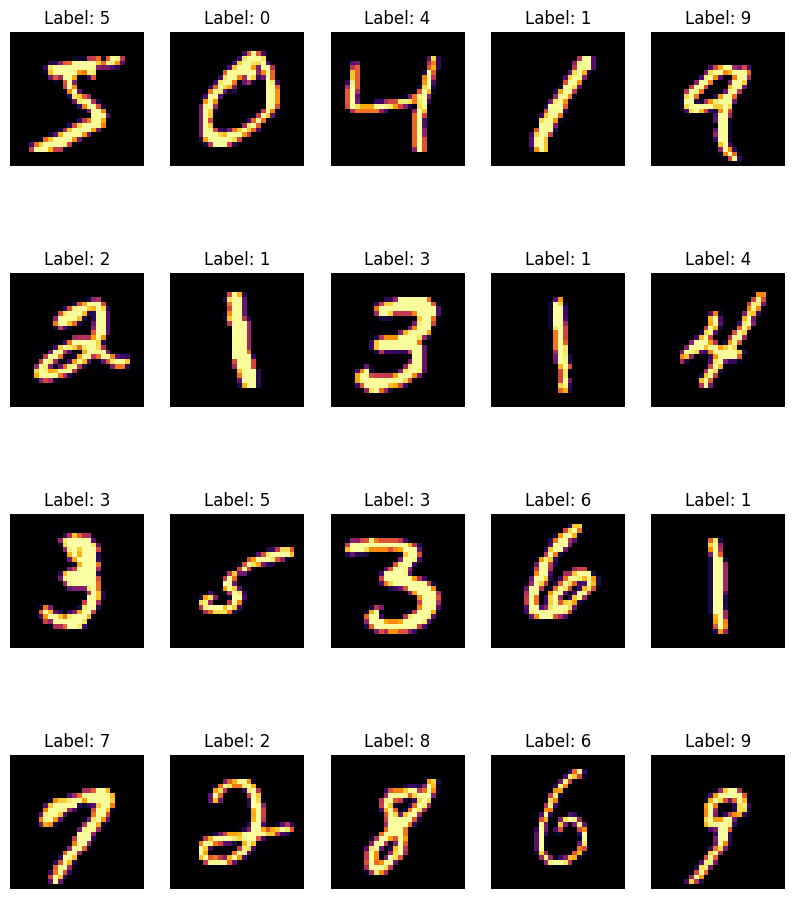

In [8]:
import matplotlib.pyplot as plt

num_images_to_visualize = 20
images_per_row = 5
num_rows = num_images_to_visualize // images_per_row

plt.figure(figsize=(10, 3 * num_rows))

# Visualize the selected images
for image_index in range(num_images_to_visualize):
    plt.subplot(num_rows, images_per_row, image_index + 1)
    plt.imshow(X_train[image_index], cmap='inferno')  # cmap='gray' for grayscale images
    plt.title(f"Label: {y_train[image_index]}")
    plt.axis('off')

plt.show()


### 2. Build Neural Network Model

Build a two-layer neural network (except for the input and output layers) using `Sequential()`
( See https://keras.io/models/sequential )
> INPUT -> LINEAR -> RELU -> LINEAR -> SOFTMAX

with the hidden layer of size 512.

See Keras Model: https://keras.io/models/about-keras-models/

In [9]:
from keras import models
from keras import layers

nn = models.Sequential() # Create Model
nn.add(layers.Dense(784,activation = 'linear',input_shape=(None,784))) # Input Layer
nn.add(layers.Dense(512,activation = 'relu')) # Hidden Layer #1
nn.add(layers.Dense(512,activation = 'linear')) # Hidden Layer #2
nn.add(layers.Dense(10,activation = 'softmax')) # Output Layer


Compile your model with the following argument.

```
optimizer='sgd',
loss='categorical_crossentropy',
metrics=['accuracy']
```

In [10]:
nn.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Let's see how our model looks using `.summary()`

In [11]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 784)         615440    
                                                                 
 dense_1 (Dense)             (None, None, 512)         401920    
                                                                 
 dense_2 (Dense)             (None, None, 512)         262656    
                                                                 
 dense_3 (Dense)             (None, None, 10)          5130      
                                                                 
Total params: 1285146 (4.90 MB)
Trainable params: 1285146 (4.90 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 3. Preprocessing

- Reshape (flatten) the features data and normalize the value to be between 0 and 1
- One-hot the target data

In [12]:
from keras.utils import to_categorical
from keras.utils import normalize

# Reshape (flatten)
X_train_reshaped = X_train.reshape((X_train.shape[0], -1))
X_test_reshaped = X_test.reshape((X_test.shape[0], -1))

# Normalize the value to be between 0 and 1
X_train = X_train_reshaped / 255.0
X_test = X_test_reshaped / 255.0

# One-hot encode target data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
print("Training Data Shape:", X_train.shape)  # (Number of Samples, Image Height, Image Width)
print("Testing Data Shape:", X_test.shape)  # (Number of Samples, Image Height, Image Width)

Training Data Shape: (60000, 784)
Testing Data Shape: (10000, 784)


In [14]:
# Minimum and Maximum value in normalized training data
print(f"Minimum value in normalized training data:", X_train.min())
print(f"Maximum value in normalized training data:", X_train.max())

# Minimum and Maximum value in normalized testing data
print(f"Minimum value in normalized testing data:", X_test.min())
print(f"Maximum value in normalized testing data:", X_test.max())


Minimum value in normalized training data: 0.0
Maximum value in normalized training data: 1.0
Minimum value in normalized testing data: 0.0
Maximum value in normalized testing data: 1.0


### 4. Model Training

Use `.fit()` to train your neural network model and return a record of accuracy and loss values for each epoch.

We will train the model for 10 epochs (If you are confident in your computer's performance, you can train the model with more epochs.)

We will train using the mini-batch method, with each batch containing 128 data points.

To avoid overfitting with the test set, we will split the current training data into 90% for training and 10% for validating the model.

This will take approximately one minute.

In [15]:
from sklearn.model_selection import train_test_split
history = nn.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.1)

Epoch 1/30
422/422 [==============================] - 26s 58ms/step - loss: 0.7578 - accuracy: 0.8144 - val_loss: 0.3463 - val_accuracy: 0.9103
Epoch 2/30
422/422 [==============================] - 20s 47ms/step - loss: 0.3662 - accuracy: 0.8978 - val_loss: 0.2721 - val_accuracy: 0.9230
Epoch 3/30
422/422 [==============================] - 13s 31ms/step - loss: 0.3112 - accuracy: 0.9119 - val_loss: 0.2415 - val_accuracy: 0.9330
Epoch 4/30
422/422 [==============================] - 13s 31ms/step - loss: 0.2799 - accuracy: 0.9211 - val_loss: 0.2201 - val_accuracy: 0.9385
Epoch 5/30
422/422 [==============================] - 11s 27ms/step - loss: 0.2563 - accuracy: 0.9270 - val_loss: 0.2067 - val_accuracy: 0.9413
Epoch 6/30
422/422 [==============================] - 19s 46ms/step - loss: 0.2368 - accuracy: 0.9329 - val_loss: 0.1885 - val_accuracy: 0.9490
Epoch 7/30
422/422 [==============================] - 21s 50ms/step - loss: 0.2199 - accuracy: 0.9379 - val_loss: 0.1782 - val_accuracy:

We will plot the loss and accuracy of both the train and validate sets over iterations.

In [16]:
import  matplotlib.pyplot  as plt
%matplotlib inline

In [17]:
# The function argument is the model's history during the training process.
def plot_loss_fn(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'go', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

def plot_acc_fn(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'go', label='Training acc')
    plt.plot(epochs, val_acc, 'g', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

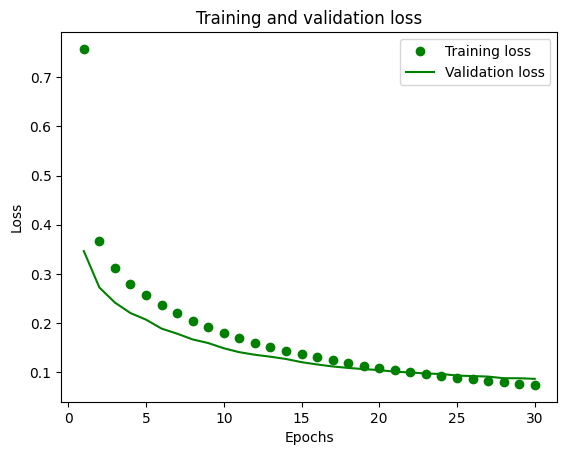

In [18]:
plot_loss_fn(history)

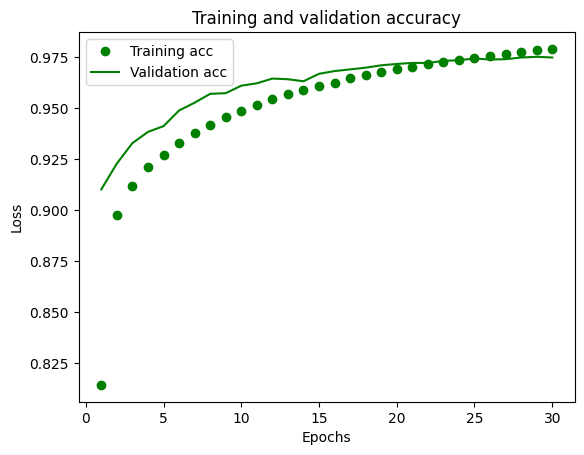

In [19]:
plot_acc_fn(history)

Q: At which iteration does your model start to overfit? Give your rational.

**ANSWER**
1. จากกราฟ Training and validation loss จะเห็นได้ว่า โมเดลช่วงที่มี epoch = 25 - 30 จะมี loss ที่ลดลงเรื่อย ๆ จนถึงจุดที่เริ่มลดน้อยลงจนเกือบจะเป็นค่าคงที่ ซึ่งมีการเปลี่ยนแปลงน้อยมาก ๆ ช่วงนี้จึงเกิด overfit ขึ้น
2. จากกราฟ Training and validation accuracy จะเห็นได้ว่า โมเดลช่วงที่มี epoch = 25 - 30 จะมี accuracy ที่เพิ่มขึ้นเรื่อย ๆ จนถึงจุดที่เริ่มเพิ่มขึ้นจนเกือบจะเป็นค่าคงที่ ซึ่งมีการเปลี่ยนแปลงน้อยมาก ๆ ช่วงนี้จึงเกิด overfit ขึ้น

### 5. Model Evaluation

Evaluate your model with test set using `.evaluate()` and compare the results to those from the training and validate sets. Does your model overfit or underfit? How about the bias and variance?

In [20]:
test_loss, test_acc = nn.evaluate(X_test, y_test)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 3s 9ms/step - loss: 0.0910 - accuracy: 0.9722
Test Loss: 0.0910298302769661
Test Accuracy: 0.9721999764442444


In [21]:
test_loss, test_acc = nn.evaluate(X_train, y_train)
print('Train Loss: %s\nTrain Accuracy: %s' % (test_loss,test_acc))

1875/1875 [==============================] - 12s 7ms/step - loss: 0.0726 - accuracy: 0.9799
Train Loss: 0.07256708294153214
Train Accuracy: 0.9799166917800903


- Does your model overfit or underfit? How about the bias and variance?

  **Does your model overfit or underfit**
  - Model fit มีความพอดี ไม่ overfit หรือ underfit

  - พิจารณาจาก Training accuracy (0.9799) มากกว่า Test accuracy (0.9722) เพียงเล็กน้อย

  **How about the bias and variance?**
  - Model เป็น Good Model เพราะ Test Accuracy ค่อนข้างสูง และ Training accuracy กับ Test accuracy ห่างกันเพียงเล็กน้อยเท่านั้นทำให้เกิดความ Balance กัน
  - Bias ต่ำเพราะ Training accuracy (0.9799) สูง
  - Variance ต่ำเพราะ Training accuracy กับ Test accuracy ห่างกันเพียงเล็กน้อยเท่านั้น

Q: Analyze the performance of your model using a confusion matrix. Which class does your model frequently misclassify? What is the precision and recall of your model?

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

### evaluate your model ###
y_pred = nn.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test2 = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_test2, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test2, y_pred))

313/313 [==============================] - 2s 7ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Confusion Matrix:
[[ 963    0    1    1    0    5    4    2    2    2]
 [   0 1120    3    1    0    1    4    1    5    0]
 [   4    1 1010    2    3    0    1 


**ANSWER**

- Does your model overfit or underfit? How about the bias and variance?

  **Does your model overfit or underfit**
  - Model fit มีความพอดี ไม่ overfit หรือ underfit

  - พิจารณาจาก Training accuracy (0.9799) มากกว่า Test accuracy (0.9722) เพียงเล็กน้อย

  **How about the bias and variance?**
  - Model เป็น Good Model เพราะ Test Accuracy ค่อนข้างสูง และ Training accuracy กับ Test accuracy ห่างกันเพียงเล็กน้อยเท่านั้นทำให้เกิดความ Balance กัน
  - Bias ต่ำเพราะ Training accuracy (0.9799) สูง
  - Variance ต่ำเพราะ Training accuracy กับ Test accuracy ห่างกันเพียงเล็กน้อยเท่านั้น

<br><br>
- Which class does your model frequently misclassify?

class ที่มีการทำนายผิดมากที่สุดคือ class 2 ที่มี precision = 0.96 ซึ่งหมายความว่าทำนายเลข 2 เป็นเลขอื่น ๆ ทั้งหมด 4 ตัว

<br><br>
- What is the precision and recall of your model?
<br>
precision = 0.97
recall = 0.97

### 6. Model tuning

Try tuning your model by:
1. Adjust the learning rate of your optimizer by increasing and decreasing the learning rate to see how it affects your model.
2. Experiment with different optimizers ('sgd', 'rmspop', 'adagrad', 'adam', See https://keras.io/optimizers ) to see which one converges faster.
3. Change the structure of your model by adding more hidden layers with any number of nodes, and then observe how this affects your model.

**6.1. Adjust the learning rate of your optimizer by increasing and decreasing the learning rate to see how it affects your model.**

In [23]:
import tensorflow as tf

<font color='#9900cc'> **6.1.1 [Default] the learning rate of my optimizer**

In [24]:
nn_default = models.Sequential() # Create Model
nn_default.add(layers.Dense(784,activation = 'linear',input_shape=(None,784))) # Input Layer
nn_default.add(layers.Dense(512,activation = 'relu')) # Hidden Layer #1
nn_default.add(layers.Dense(512,activation = 'linear')) # Hidden Layer #2
nn_default.add(layers.Dense(10,activation = 'softmax')) # Output Layer


 - <font color='#9900cc'> Default learning rate is 0.01

In [25]:
nn_default.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history_default = nn_default.fit(X_train, y_train, batch_size=128, validation_split=0.1, epochs=10)

Epoch 1/10
422/422 [==============================] - 14s 32ms/step - loss: 0.7695 - accuracy: 0.8135 - val_loss: 0.3469 - val_accuracy: 0.9085
Epoch 2/10
422/422 [==============================] - 11s 27ms/step - loss: 0.3677 - accuracy: 0.8979 - val_loss: 0.2704 - val_accuracy: 0.9222
Epoch 3/10
422/422 [==============================] - 12s 29ms/step - loss: 0.3089 - accuracy: 0.9129 - val_loss: 0.2340 - val_accuracy: 0.9328
Epoch 4/10
422/422 [==============================] - 17s 40ms/step - loss: 0.2750 - accuracy: 0.9222 - val_loss: 0.2123 - val_accuracy: 0.9392
Epoch 5/10
422/422 [==============================] - 13s 31ms/step - loss: 0.2504 - accuracy: 0.9288 - val_loss: 0.1942 - val_accuracy: 0.9468
Epoch 6/10
422/422 [==============================] - 13s 30ms/step - loss: 0.2303 - accuracy: 0.9341 - val_loss: 0.1805 - val_accuracy: 0.9522
Epoch 7/10
422/422 [==============================] - 13s 30ms/step - loss: 0.2132 - accuracy: 0.9398 - val_loss: 0.1673 - val_accuracy:

In [27]:
test_loss, test_acc = nn_default.evaluate(X_test, y_test)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 2s 7ms/step - loss: 0.1655 - accuracy: 0.9518
Test Loss: 0.16551458835601807
Test Accuracy: 0.9517999887466431


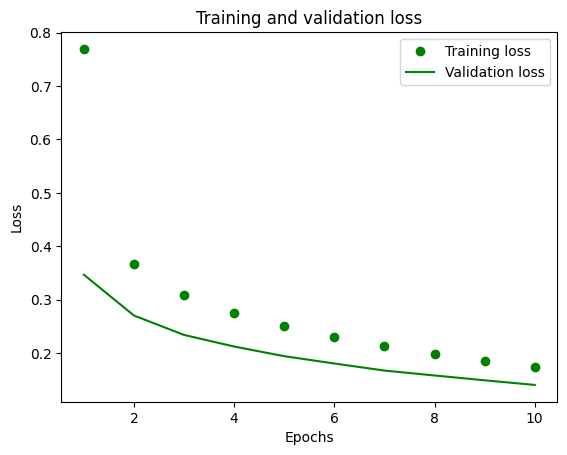

In [28]:
plot_loss_fn(history_default)

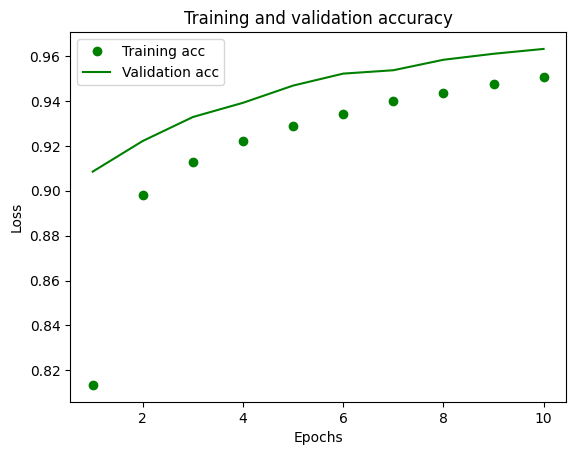

In [29]:
plot_acc_fn(history_default)

 <font color='#9900cc'> **6.1.2 [Increasing] the learning rate of my optimizer**

In [30]:
nn_increasing = models.Sequential() # Create Model
nn_increasing.add(layers.Dense(784,activation = 'linear',input_shape=(None,784))) # Input Layer
nn_increasing.add(layers.Dense(512,activation = 'relu')) # Hidden Layer #1
nn_increasing.add(layers.Dense(512,activation = 'linear')) # Hidden Layer #2
nn_increasing.add(layers.Dense(10,activation = 'softmax')) # Output Layer

 - <font color='#9900cc'> Increasing learning rate is 0.1

In [31]:
nn_increasing.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
history_increasing = nn_increasing.fit(X_train, y_train, batch_size=128, validation_split=0.1, epochs=10)

Epoch 1/10
422/422 [==============================] - 14s 31ms/step - loss: 0.3339 - accuracy: 0.9019 - val_loss: 0.1554 - val_accuracy: 0.9575
Epoch 2/10
422/422 [==============================] - 12s 29ms/step - loss: 0.1480 - accuracy: 0.9574 - val_loss: 0.1009 - val_accuracy: 0.9720
Epoch 3/10
422/422 [==============================] - 11s 26ms/step - loss: 0.1011 - accuracy: 0.9701 - val_loss: 0.0835 - val_accuracy: 0.9772
Epoch 4/10
422/422 [==============================] - 13s 30ms/step - loss: 0.0762 - accuracy: 0.9777 - val_loss: 0.0769 - val_accuracy: 0.9783
Epoch 5/10
422/422 [==============================] - 13s 31ms/step - loss: 0.0601 - accuracy: 0.9825 - val_loss: 0.0712 - val_accuracy: 0.9795
Epoch 6/10
422/422 [==============================] - 13s 30ms/step - loss: 0.0474 - accuracy: 0.9870 - val_loss: 0.0720 - val_accuracy: 0.9805
Epoch 7/10
422/422 [==============================] - 13s 32ms/step - loss: 0.0391 - accuracy: 0.9887 - val_loss: 0.0707 - val_accuracy:

In [33]:
test_loss, test_acc = nn_increasing.evaluate(X_test, y_test)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 2s 6ms/step - loss: 0.0638 - accuracy: 0.9800
Test Loss: 0.06379667669534683
Test Accuracy: 0.9800000190734863


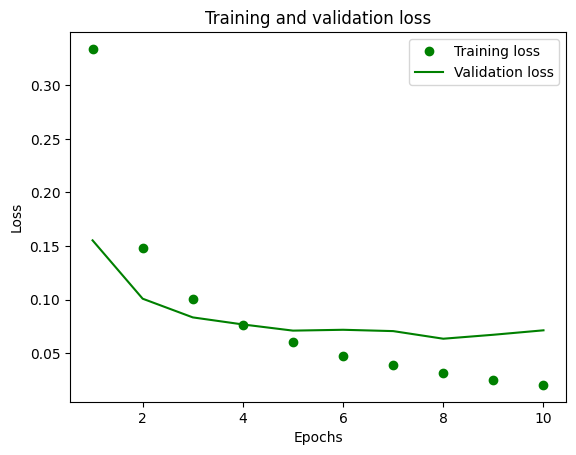

In [34]:
plot_loss_fn(history_increasing)

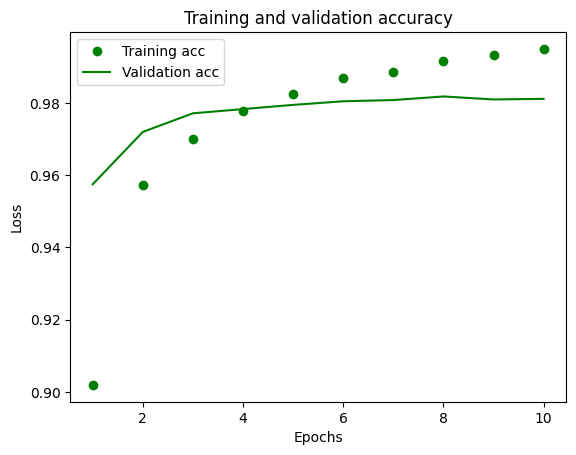

In [35]:
plot_acc_fn(history_increasing)

<font color='#9900cc'>  **6.1.3 [Decreasing] the learning rate of my optimizer**



In [36]:
nn_decreasing = models.Sequential() # Create Model
nn_decreasing.add(layers.Dense(784,activation = 'linear',input_shape=(None,784))) # Input Layer
nn_decreasing.add(layers.Dense(512,activation = 'relu')) # Hidden Layer #1
nn_decreasing.add(layers.Dense(512,activation = 'linear')) # Hidden Layer #2
nn_decreasing.add(layers.Dense(10,activation = 'softmax')) # Output Layer

 - <font color='#9900cc'> Decreasing learning rate is 0.005

In [37]:
nn_decreasing.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
history_decreasing = nn_decreasing.fit(X_train, y_train, batch_size=128, validation_split=0.1, epochs=10)

Epoch 1/10
422/422 [==============================] - 13s 30ms/step - loss: 1.0326 - accuracy: 0.7665 - val_loss: 0.4823 - val_accuracy: 0.8948
Epoch 2/10
422/422 [==============================] - 11s 26ms/step - loss: 0.4678 - accuracy: 0.8784 - val_loss: 0.3393 - val_accuracy: 0.9152
Epoch 3/10
422/422 [==============================] - 12s 28ms/step - loss: 0.3813 - accuracy: 0.8951 - val_loss: 0.2916 - val_accuracy: 0.9237
Epoch 4/10
422/422 [==============================] - 14s 33ms/step - loss: 0.3421 - accuracy: 0.9048 - val_loss: 0.2666 - val_accuracy: 0.9290
Epoch 5/10
422/422 [==============================] - 12s 29ms/step - loss: 0.3173 - accuracy: 0.9108 - val_loss: 0.2497 - val_accuracy: 0.9322
Epoch 6/10
422/422 [==============================] - 14s 34ms/step - loss: 0.2987 - accuracy: 0.9155 - val_loss: 0.2371 - val_accuracy: 0.9363
Epoch 7/10
422/422 [==============================] - 12s 30ms/step - loss: 0.2836 - accuracy: 0.9204 - val_loss: 0.2264 - val_accuracy:

In [39]:
test_loss, test_acc = nn_decreasing.evaluate(X_test, y_test)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 3s 9ms/step - loss: 0.2329 - accuracy: 0.9341
Test Loss: 0.23289474844932556
Test Accuracy: 0.9340999722480774


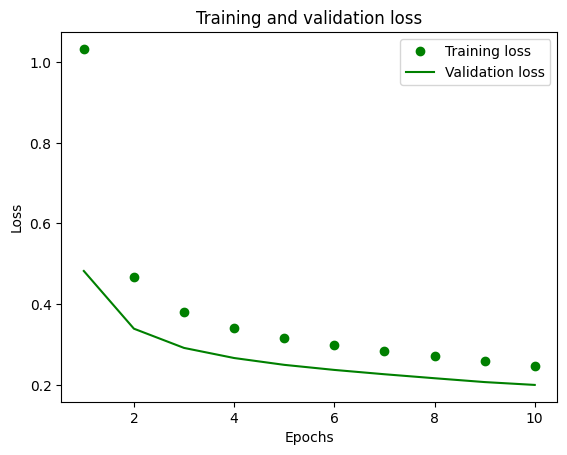

In [40]:
plot_loss_fn(history_decreasing)

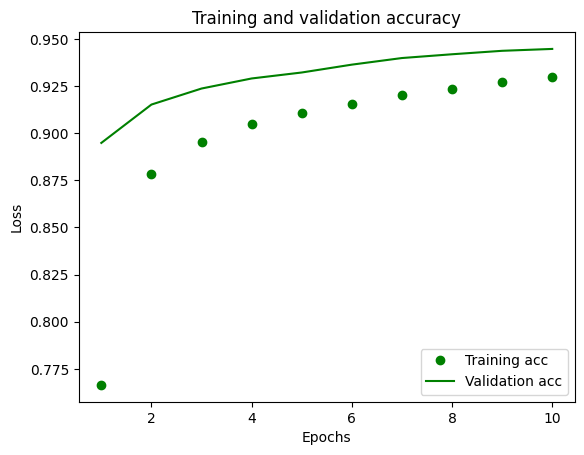

In [41]:
plot_acc_fn(history_decreasing)

**Summary**

Default learning rate = 0.01
- ได้ Test Loss: 0.16551458835601807
- และได้ Test Accuracy: 0.9517999887466431

Increasing learning rate is 0.1
- ได้ Test Loss: 0.06379667669534683
- และได้ Test Accuracy: 0.9800000190734863

Decreasing learning rate is 0.005
- ได้ Test Loss: 0.23289474844932556
- และได้ Test Accuracy: 0.9340999722480774

จะเห็นได้ว่าเมื่อเพิ่ม learning rate จะได้ Accuracy ที่เพิ่มขึ้นและ Loss ที่น้อยลง (เปรียบเทียบ Default และ Increasing)

และในทางตรงกันข้ามถ้าลด learning rate จะได้ Accuracy ที่ลดลงและ Loss ที่เพิ่มขึ้น (เปรียบเทียบ Default และ Decreasing)

**6.2. Experiment with different optimizers ('sgd', 'rmsprop', 'adagrad', 'adam', See https://keras.io/optimizers ) to see which one converges faster.**

---



In [42]:
import time

 - <font color='#9900cc'> 6.2.1 optimizer = sgd

In [43]:
nn_default = models.Sequential() # Create Model
nn_default.add(layers.Dense(784,activation = 'linear',input_shape=(None,784))) # Input Layer
nn_default.add(layers.Dense(512,activation = 'relu')) # Hidden Layer #1
nn_default.add(layers.Dense(512,activation = 'linear')) # Hidden Layer #2
nn_default.add(layers.Dense(10,activation = 'softmax')) # Output Layer

In [44]:
nn_default.compile(optimizer = 'sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
start = time.time()
history = nn_default.fit(X_train, y_train, batch_size=128, validation_split=0.1, epochs=10)
end = time.time()
print("Run time: ",end - start)

Epoch 1/10
422/422 [==============================] - 13s 30ms/step - loss: 0.7701 - accuracy: 0.8143 - val_loss: 0.3432 - val_accuracy: 0.9098
Epoch 2/10
422/422 [==============================] - 12s 29ms/step - loss: 0.3651 - accuracy: 0.8980 - val_loss: 0.2718 - val_accuracy: 0.9260
Epoch 3/10
422/422 [==============================] - 11s 25ms/step - loss: 0.3107 - accuracy: 0.9118 - val_loss: 0.2389 - val_accuracy: 0.9345
Epoch 4/10
422/422 [==============================] - 13s 31ms/step - loss: 0.2793 - accuracy: 0.9207 - val_loss: 0.2185 - val_accuracy: 0.9390
Epoch 5/10
422/422 [==============================] - 13s 30ms/step - loss: 0.2558 - accuracy: 0.9274 - val_loss: 0.2025 - val_accuracy: 0.9437
Epoch 6/10
422/422 [==============================] - 14s 33ms/step - loss: 0.2364 - accuracy: 0.9331 - val_loss: 0.1909 - val_accuracy: 0.9458
Epoch 7/10
422/422 [==============================] - 20s 48ms/step - loss: 0.2200 - accuracy: 0.9376 - val_loss: 0.1763 - val_accuracy:

In [46]:
test_loss, test_acc = nn_default.evaluate(X_test, y_test)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 2s 5ms/step - loss: 0.1715 - accuracy: 0.9508
Test Loss: 0.1715206503868103
Test Accuracy: 0.9508000016212463


 - <font color='#9900cc'> 6.2.2 optimizer = rmsprop

In [47]:
nn_default = models.Sequential() # Create Model
nn_default.add(layers.Dense(784,activation = 'linear',input_shape=(None,784))) # Input Layer
nn_default.add(layers.Dense(512,activation = 'relu')) # Hidden Layer #1
nn_default.add(layers.Dense(512,activation = 'linear')) # Hidden Layer #2
nn_default.add(layers.Dense(10,activation = 'softmax')) # Output Layer

In [48]:
nn_default.compile(optimizer = 'rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
start = time.time()
history = nn_default.fit(X_train, y_train, batch_size=128, validation_split=0.1, epochs=10)
end = time.time()
print("Run time: ",end - start)

Epoch 1/10
422/422 [==============================] - 15s 35ms/step - loss: 0.2863 - accuracy: 0.9135 - val_loss: 0.1174 - val_accuracy: 0.9667
Epoch 2/10
422/422 [==============================] - 15s 34ms/step - loss: 0.1324 - accuracy: 0.9613 - val_loss: 0.0902 - val_accuracy: 0.9755
Epoch 3/10
422/422 [==============================] - 15s 35ms/step - loss: 0.0987 - accuracy: 0.9700 - val_loss: 0.0996 - val_accuracy: 0.9730
Epoch 4/10
422/422 [==============================] - 15s 35ms/step - loss: 0.0838 - accuracy: 0.9757 - val_loss: 0.0797 - val_accuracy: 0.9785
Epoch 5/10
422/422 [==============================] - 15s 34ms/step - loss: 0.0694 - accuracy: 0.9795 - val_loss: 0.0835 - val_accuracy: 0.9785
Epoch 6/10
422/422 [==============================] - 14s 34ms/step - loss: 0.0640 - accuracy: 0.9808 - val_loss: 0.0928 - val_accuracy: 0.9783
Epoch 7/10
422/422 [==============================] - 15s 34ms/step - loss: 0.0544 - accuracy: 0.9844 - val_loss: 0.1155 - val_accuracy:

In [50]:
test_loss, test_acc = nn_default.evaluate(X_test, y_test)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 2s 6ms/step - loss: 0.1841 - accuracy: 0.9676
Test Loss: 0.18412961065769196
Test Accuracy: 0.9675999879837036


 - <font color='#9900cc'> 6.2.3 optimizer = adagrad

In [51]:
nn_default = models.Sequential() # Create Model
nn_default.add(layers.Dense(784,activation = 'linear',input_shape=(None,784))) # Input Layer
nn_default.add(layers.Dense(512,activation = 'relu')) # Hidden Layer #1
nn_default.add(layers.Dense(512,activation = 'linear')) # Hidden Layer #2
nn_default.add(layers.Dense(10,activation = 'softmax')) # Output Layer

In [52]:
nn_default.compile(optimizer = 'adagrad',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
start = time.time()
history = nn_default.fit(X_train, y_train, batch_size=128, validation_split=0.1, epochs=10)
end = time.time()
print("Run time: ",end - start)

Epoch 1/10
422/422 [==============================] - 15s 35ms/step - loss: 1.2636 - accuracy: 0.7139 - val_loss: 0.6610 - val_accuracy: 0.8653
Epoch 2/10
422/422 [==============================] - 14s 34ms/step - loss: 0.5968 - accuracy: 0.8541 - val_loss: 0.4310 - val_accuracy: 0.8987
Epoch 3/10
422/422 [==============================] - 14s 34ms/step - loss: 0.4625 - accuracy: 0.8787 - val_loss: 0.3546 - val_accuracy: 0.9105
Epoch 4/10
422/422 [==============================] - 14s 34ms/step - loss: 0.4046 - accuracy: 0.8903 - val_loss: 0.3169 - val_accuracy: 0.9185
Epoch 5/10
422/422 [==============================] - 14s 34ms/step - loss: 0.3709 - accuracy: 0.8978 - val_loss: 0.2931 - val_accuracy: 0.9220
Epoch 6/10
422/422 [==============================] - 14s 34ms/step - loss: 0.3476 - accuracy: 0.9028 - val_loss: 0.2764 - val_accuracy: 0.9237
Epoch 7/10
422/422 [==============================] - 14s 33ms/step - loss: 0.3300 - accuracy: 0.9072 - val_loss: 0.2638 - val_accuracy:

In [54]:
test_loss, test_acc = nn_default.evaluate(X_test, y_test)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 2s 6ms/step - loss: 0.2739 - accuracy: 0.9239
Test Loss: 0.27390193939208984
Test Accuracy: 0.9239000082015991


 - <font color='#9900cc'> 6.2.4 optimizer = adam

In [55]:
nn_default = models.Sequential() # Create Model
nn_default.add(layers.Dense(784,activation = 'linear',input_shape=(None,784))) # Input Layer
nn_default.add(layers.Dense(512,activation = 'relu')) # Hidden Layer #1
nn_default.add(layers.Dense(512,activation = 'linear')) # Hidden Layer #2
nn_default.add(layers.Dense(10,activation = 'softmax')) # Output Layer

In [56]:
nn_default.compile(optimizer = 'adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [57]:
start = time.time()
history = nn_default.fit(X_train, y_train, batch_size=128, validation_split=0.1, epochs=10)
end = time.time()
print("Run time: ",end - start)

Epoch 1/10
422/422 [==============================] - 19s 41ms/step - loss: 0.2239 - accuracy: 0.9319 - val_loss: 0.1491 - val_accuracy: 0.9533
Epoch 2/10
422/422 [==============================] - 17s 39ms/step - loss: 0.1233 - accuracy: 0.9632 - val_loss: 0.1014 - val_accuracy: 0.9712
Epoch 3/10
422/422 [==============================] - 16s 38ms/step - loss: 0.0925 - accuracy: 0.9719 - val_loss: 0.1080 - val_accuracy: 0.9712
Epoch 4/10
422/422 [==============================] - 16s 37ms/step - loss: 0.0837 - accuracy: 0.9744 - val_loss: 0.1113 - val_accuracy: 0.9710
Epoch 5/10
422/422 [==============================] - 16s 37ms/step - loss: 0.0712 - accuracy: 0.9783 - val_loss: 0.1368 - val_accuracy: 0.9640
Epoch 6/10
422/422 [==============================] - 15s 36ms/step - loss: 0.0647 - accuracy: 0.9799 - val_loss: 0.1024 - val_accuracy: 0.9727
Epoch 7/10
422/422 [==============================] - 15s 36ms/step - loss: 0.0641 - accuracy: 0.9804 - val_loss: 0.0953 - val_accuracy:

In [58]:
test_loss, test_acc = nn_default.evaluate(X_test, y_test)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 2s 5ms/step - loss: 0.1249 - accuracy: 0.9698
Test Loss: 0.12488923221826553
Test Accuracy: 0.9697999954223633


**Summary**

จาก Optimizer ทั้ง 4 ตัว 'sgd', 'rmsprop', 'adagrad', 'adam'
1. sgd ได้ Run time เป็น 137.26582503318787
2. rmsprop ได้ Run time เป็น 147.90201449394226
3. adagrad ได้ Run time เป็น 203.00387930870056
4. adam ได้ Run time เป็น 203.80285334587097

จะได้ลำดับความเร็วจากมากไปน้อย ดังนี้
sgd > rmsprop > adagrad > adam

**6.3. Change the structure of your model by adding more hidden layers with any number of nodes, and then observe how this affects your model.**

<font color='#9900cc'> **เปรียบเทียบถ้าเพิ่ม hidden layer (1&2)**

 - <font color='#9900cc'> 6.3.1 Adding 1 hidden layer, activation = relu with 512 neurons

In [59]:
nn = models.Sequential() # Create Model
nn.add(layers.Dense(784,activation = 'linear',input_shape=(None,784))) # Input Layer
nn.add(layers.Dense(512,activation = 'relu')) # Hidden Layer #1
nn.add(layers.Dense(512,activation = 'relu')) # Hidden Layer #2
nn.add(layers.Dense(512,activation = 'linear')) # Hidden Layer #3
nn.add(layers.Dense(10,activation = 'softmax')) # Output Layer

In [60]:
nn.compile(optimizer = 'sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
start = time.time()
history = nn.fit(X_train, y_train, batch_size=128, validation_split=0.1, epochs=10)
end = time.time()
print("Run time: ",end - start)

Epoch 1/10
422/422 [==============================] - 16s 35ms/step - loss: 0.8350 - accuracy: 0.8007 - val_loss: 0.3342 - val_accuracy: 0.9145
Epoch 2/10
422/422 [==============================] - 14s 34ms/step - loss: 0.3492 - accuracy: 0.9016 - val_loss: 0.2529 - val_accuracy: 0.9288
Epoch 3/10
422/422 [==============================] - 15s 35ms/step - loss: 0.2903 - accuracy: 0.9175 - val_loss: 0.2184 - val_accuracy: 0.9377
Epoch 4/10
422/422 [==============================] - 16s 38ms/step - loss: 0.2544 - accuracy: 0.9279 - val_loss: 0.1934 - val_accuracy: 0.9470
Epoch 5/10
422/422 [==============================] - 20s 48ms/step - loss: 0.2268 - accuracy: 0.9344 - val_loss: 0.1778 - val_accuracy: 0.9518
Epoch 6/10
422/422 [==============================] - 18s 43ms/step - loss: 0.2045 - accuracy: 0.9422 - val_loss: 0.1578 - val_accuracy: 0.9573
Epoch 7/10
422/422 [==============================] - 15s 36ms/step - loss: 0.1860 - accuracy: 0.9467 - val_loss: 0.1496 - val_accuracy:

In [62]:
test_loss, test_acc = nn.evaluate(X_test, y_test)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 3s 10ms/step - loss: 0.1397 - accuracy: 0.9573
Test Loss: 0.13967406749725342
Test Accuracy: 0.9573000073432922


 - <font color='#9900cc'> 6.3.2 Adding 2 hidden layer, activation = relu with 512 neurons

In [63]:
nn = models.Sequential() # Create Model
nn.add(layers.Dense(784,activation = 'linear',input_shape=(None,784))) # Input Layer
nn.add(layers.Dense(512,activation = 'relu')) # Hidden Layer #1
nn.add(layers.Dense(512,activation = 'relu')) # Hidden Layer #2
nn.add(layers.Dense(512,activation = 'relu')) # Hidden Layer #3
nn.add(layers.Dense(512,activation = 'linear')) # Hidden Layer #4
nn.add(layers.Dense(10,activation = 'softmax')) # Output Layer

In [64]:
nn.compile(optimizer = 'sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
start = time.time()
history = nn.fit(X_train, y_train, batch_size=128, validation_split=0.1, epochs=10)
end = time.time()
print("Run time: ",end - start)

Epoch 1/10
422/422 [==============================] - 18s 41ms/step - loss: 0.9064 - accuracy: 0.7840 - val_loss: 0.3285 - val_accuracy: 0.9130
Epoch 2/10
422/422 [==============================] - 17s 41ms/step - loss: 0.3327 - accuracy: 0.9041 - val_loss: 0.2434 - val_accuracy: 0.9307
Epoch 3/10
422/422 [==============================] - 17s 41ms/step - loss: 0.2690 - accuracy: 0.9217 - val_loss: 0.2038 - val_accuracy: 0.9423
Epoch 4/10
422/422 [==============================] - 18s 42ms/step - loss: 0.2315 - accuracy: 0.9323 - val_loss: 0.1744 - val_accuracy: 0.9520
Epoch 5/10
422/422 [==============================] - 19s 46ms/step - loss: 0.2032 - accuracy: 0.9410 - val_loss: 0.1593 - val_accuracy: 0.9560
Epoch 6/10
422/422 [==============================] - 17s 41ms/step - loss: 0.1810 - accuracy: 0.9471 - val_loss: 0.1478 - val_accuracy: 0.9600
Epoch 7/10
422/422 [==============================] - 17s 40ms/step - loss: 0.1636 - accuracy: 0.9530 - val_loss: 0.1357 - val_accuracy:

In [66]:
test_loss, test_acc = nn.evaluate(X_test, y_test)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 4s 12ms/step - loss: 0.1257 - accuracy: 0.9620
Test Loss: 0.1256873458623886
Test Accuracy: 0.9620000123977661


<font color='#9900cc'> **เปรียบเทียบถ้าเพิ่ม neurons ไม่เท่ากัน (200 & 20)**

 - <font color='#9900cc'> 6.3.3 Adding 1 hidden layer, activation = relu with 200 neurons

In [67]:
nn = models.Sequential() # Create Model
nn.add(layers.Dense(784,activation = 'linear',input_shape=(None,784))) # Input Layer
nn.add(layers.Dense(512,activation = 'relu')) # Hidden Layer #1
nn.add(layers.Dense(200,activation = 'relu')) # Hidden Layer #2
nn.add(layers.Dense(512,activation = 'linear')) # Hidden Layer #3
nn.add(layers.Dense(10,activation = 'softmax')) # Output Layer

In [68]:
nn.compile(optimizer = 'sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
start = time.time()
history = nn.fit(X_train, y_train, batch_size=128, validation_split=0.1, epochs=10)
end = time.time()
print("Run time: ",end - start)

Epoch 1/10
422/422 [==============================] - 13s 30ms/step - loss: 0.8887 - accuracy: 0.7827 - val_loss: 0.3385 - val_accuracy: 0.9127
Epoch 2/10
422/422 [==============================] - 21s 50ms/step - loss: 0.3529 - accuracy: 0.9018 - val_loss: 0.2520 - val_accuracy: 0.9283
Epoch 3/10
422/422 [==============================] - 12s 29ms/step - loss: 0.2904 - accuracy: 0.9168 - val_loss: 0.2177 - val_accuracy: 0.9390
Epoch 4/10
422/422 [==============================] - 11s 26ms/step - loss: 0.2550 - accuracy: 0.9275 - val_loss: 0.1958 - val_accuracy: 0.9455
Epoch 5/10
422/422 [==============================] - 12s 29ms/step - loss: 0.2274 - accuracy: 0.9352 - val_loss: 0.1778 - val_accuracy: 0.9527
Epoch 6/10
422/422 [==============================] - 13s 30ms/step - loss: 0.2056 - accuracy: 0.9405 - val_loss: 0.1589 - val_accuracy: 0.9588
Epoch 7/10
422/422 [==============================] - 13s 30ms/step - loss: 0.1870 - accuracy: 0.9460 - val_loss: 0.1488 - val_accuracy:

In [70]:
test_loss, test_acc = nn.evaluate(X_test, y_test)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 2s 6ms/step - loss: 0.1430 - accuracy: 0.9560
Test Loss: 0.1429959535598755
Test Accuracy: 0.9559999704360962


 - <font color='#9900cc'> 6.3.4 Adding 1 hidden layer, activation = relu with 20 neurons

In [71]:
nn = models.Sequential() # Create Model
nn.add(layers.Dense(784,activation = 'linear',input_shape=(None,784))) # Input Layer
nn.add(layers.Dense(512,activation = 'relu')) # Hidden Layer #1
nn.add(layers.Dense(20,activation = 'relu')) # Hidden Layer #2
nn.add(layers.Dense(512,activation = 'linear')) # Hidden Layer #3
nn.add(layers.Dense(10,activation = 'softmax')) # Output Layer

In [72]:
nn.compile(optimizer = 'sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
start = time.time()
history = nn.fit(X_train, y_train, batch_size=128, validation_split=0.1, epochs=10)
end = time.time()
print("Run time: ",end - start)

Epoch 1/10
422/422 [==============================] - 12s 24ms/step - loss: 1.2086 - accuracy: 0.6692 - val_loss: 0.4211 - val_accuracy: 0.8947
Epoch 2/10
422/422 [==============================] - 11s 26ms/step - loss: 0.4080 - accuracy: 0.8879 - val_loss: 0.2915 - val_accuracy: 0.9188
Epoch 3/10
422/422 [==============================] - 15s 36ms/step - loss: 0.3260 - accuracy: 0.9084 - val_loss: 0.2489 - val_accuracy: 0.9262
Epoch 4/10
422/422 [==============================] - 10s 25ms/step - loss: 0.2843 - accuracy: 0.9184 - val_loss: 0.2159 - val_accuracy: 0.9395
Epoch 5/10
422/422 [==============================] - 9s 22ms/step - loss: 0.2544 - accuracy: 0.9272 - val_loss: 0.1967 - val_accuracy: 0.9463
Epoch 6/10
422/422 [==============================] - 11s 25ms/step - loss: 0.2312 - accuracy: 0.9335 - val_loss: 0.1790 - val_accuracy: 0.9527
Epoch 7/10
422/422 [==============================] - 10s 24ms/step - loss: 0.2115 - accuracy: 0.9397 - val_loss: 0.1641 - val_accuracy: 

In [74]:
test_loss, test_acc = nn.evaluate(X_test, y_test)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 2s 5ms/step - loss: 0.1618 - accuracy: 0.9499
Test Loss: 0.1618432253599167
Test Accuracy: 0.9498999714851379


**Summary**

**Summary**

**เปรียบเทียบถ้าเพิ่ม hidden layer**
1. เพิ่ม 1 hidden layer
- Run time:  203.39522123336792
- Test Loss: 0.13967406749725342
- Test Accuracy: 0.9573000073432922
2. เพิ่ม 2 hidden layer
- Run time: 175.5271680355072
- Test Loss: 0.1256873458623886
- Test Accuracy: 0.9620000123977661

จะได้ว่าการเพิ่มจำนวน hidden layer ทำให้ Accuracy เพิ่มขึ้น

**เปรียบเทียบถ้าเพิ่ม neurons ไม่เท่ากัน (200 & 20)**
1. เพิ่ม neurons 200
- Run time:  143.03361225128174
- Test Loss: 0.1429959535598755
- Test Accuracy: 0.9559999704360962
2. เพิ่ม neurons 20
- Run time:  144.16987681388855
- Test Loss: 0.1618432253599167
- Test Accuracy: 0.9498999714851379

จะได้ว่าการเพิ่มจำนวน nuerons ทำให้ Accuracy เพิ่มขึ้น

### 7. Discussion and Result
Q: Write down your findings from the previous step.

**ANSWER**

**6.1. Adjust the learning rate of your optimizer by increasing and decreasing the learning rate to see how it affects your model.**

Default learning rate = 0.01
- ได้ Test Loss: 0.16551458835601807
- และได้ Test Accuracy: 0.9517999887466431

Increasing learning rate is 0.1
- ได้ Test Loss: 0.06379667669534683
- และได้ Test Accuracy: 0.9800000190734863

Decreasing learning rate is 0.005
- ได้ Test Loss: 0.23289474844932556
- และได้ Test Accuracy: 0.9340999722480774

จะเห็นได้ว่าเมื่อเพิ่ม learning rate จะได้ Accuracy ที่เพิ่มขึ้นและ Loss ที่น้อยลง (เปรียบเทียบ Default และ Increasing)

และในทางตรงกันข้ามถ้าลด learning rate จะได้ Accuracy ที่ลดลงและ Loss ที่เพิ่มขึ้น (เปรียบเทียบ Default และ Decreasing)

**6.2. Experiment with different optimizers ('sgd', 'rmsprop', 'adagrad', 'adam', See https://keras.io/optimizers ) to see which one converges faster.**

จาก Optimizer ทั้ง 4 ตัว 'sgd', 'rmsprop', 'adagrad', 'adam'
1. sgd ได้ Run time เป็น 143.04429149627686
2. rmsprop ได้ Run time เป็น 129.95464754104614
3. adagrad ได้ Run time เป็น 129.3540563583374
4. adam ได้ Run time เป็น 154.08738136291504

จะได้ลำดับความเร็วจากมากไปน้อย ดังนี้
adagrad > rmsprop > sgd > adam

**6.3. Change the structure of your model by adding more hidden layers with any number of nodes, and then observe how this affects your model.**

**Summary**

**เปรียบเทียบถ้าเพิ่ม hidden layer**
1. เพิ่ม 1 hidden layer
- Run time:  203.39522123336792
- Test Loss: 0.13967406749725342
- Test Accuracy: 0.9573000073432922
2. เพิ่ม 2 hidden layer
- Run time: 175.5271680355072
- Test Loss: 0.1256873458623886
- Test Accuracy: 0.9620000123977661

จะได้ว่าการเพิ่มจำนวน hidden layer ทำให้ Accuracy เพิ่มขึ้น

**เปรียบเทียบถ้าเพิ่ม neurons ไม่เท่ากัน (200 & 20)**
1. เพิ่ม neurons 200
- Run time:  143.03361225128174
- Test Loss: 0.1429959535598755
- Test Accuracy: 0.9559999704360962
2. เพิ่ม neurons 20
- Run time:  144.16987681388855
- Test Loss: 0.1618432253599167
- Test Accuracy: 0.9498999714851379

จะได้ว่าการเพิ่มจำนวน nuerons ทำให้ Accuracy เพิ่มขึ้น


